## Gaussian Mixtures

Previous methods mainly inspired by a single Gaussian distribution which is not comprehensive to describe the characteristics of real data. For instance, let consider the following example where the distribution of data is given by the combination of multiple Gaussian distributions (the read line is the data distribution while the blue ones are single Gaussian distribution).

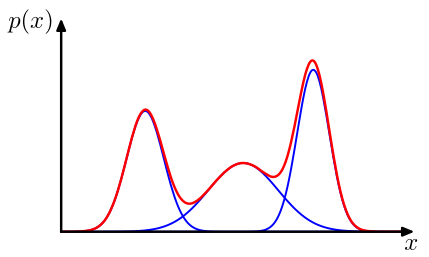

Instead of having one distribution to describe data, we can define a linear combination of multiple distributions to better describe their complexity. Such distribution is called **mixture distributions**. In the case we are working with Gaussian distribution, this distribution is called **Gaussian Mixture**. Their formal form is written as:

\begin{equation}
    p(x) = \sum_{k=1}^K \pi_k \mathcal{N}(x | \mu_k , \Sigma_k)
\end{equation}
Each Gaussian density is called a component of that Gaussian Mixture method with its own expectation $\mu_k$ and covariance $\Sigma_k$.

If we integrate (1) both side with respect to (w.r.t.) $x$, then we obtain:

\begin{align}
    &                   & \int p(x)dx = \int \pi_k \mathcal{N}(x | \mu_k , \Sigma_k)dx \\
    & \Leftrightarrow   & \sum_{k=1}^K \pi_k \int \mathcal{N}(x | \mu_k, \Sigma_k)dx = 1 \\
    & \Leftrightarrow   & \sum_{k=1}^K \pi_k = 1
\end{align}

Note that we have $p(x) \le 0$ $\forall x$, together with $\mathcal{N}(x|\mu_k, \Sigma_k) \le 0$ $\forall x, k$, which implies $\pi_k \le 0$ $\forall k$. To this end, we have:

$$
    0 \le \pi_k \le 1
$$

If we define $\pi_k = p(k)$ as the prior probability of picking the $k^{th}$ component, and $p(x | k) = \mathcal{N}(x | \mu_k, \Sigma_k)$ as the probability of having $x$ given $k$, we obtain:

$$
    p(x) = \sum_{k=1}^K p(x, k) = \sum_{k=1}^K p(x|k)p(k) = \sum_{k=1}^K \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)
$$
we again return to the formula (1). In this form, $k$ is the **latent variable**, which is recognized as one of the **latent factors** that affects how $x$ occurs.

A common way of approximating the parameters of these $k$ Gaussian distributions is deploying maximum likelihood method. From the above formula, the likelihood probability is given by

$$
    p(k | x) = \frac{p(k)p(x|k)}{p(x)} = \frac{p(k)p(x|k)}{\sum_{m=1}^K p(x, m)} = \frac{p(k)p(x|k)}{\sum_{m=1}^K p(m)p(x|m)} = \frac{\pi_k \mathcal{N}(x | \mu_k, \Sigma_k)}{\sum_{m=1}^K \pi_m \mathcal{N}(\mu_m, \Sigma_m)}
$$

Therefore, we obtain the likelihood function as follows:

$$
    ln p(X|\pi, \mu, \Sigma) = \sum_{n=1}^N ln \left[ \sum_{k=1}^K \pi_k \mathcal{N}(x_n | \mu_n, \Sigma_n) \right]
$$
where $X = \{x_1, x_2, ..., x_N\}$, $\pi = \{\pi_1, \pi_2, ..., \pi_K\}$, $\mu = \{\mu_1, \mu_2, \mu_3, ..., \mu_K\}$, and $\Sigma = \{ \Sigma_1, \Sigma_2, ..., \Sigma_K \}$

However, the maximum likelihood solution for the above likelihood function is not close-form anymore. Former studies tried to applied numerical optimization techniques, but we can deploy the more powerful **Expectation-Maximization** framework instead.

Before going to the EM framework for Gaussian Mixtures, let determine the formula of each $\mu_k$. From the likelihood function given above, we have:

\begin{align}
    \frac{\delta}{\delta \mu_k} ln p(X | \pi, \mu, \Sigma)  & = \sum_{n=1}^N \frac{\delta}{\delta \mu_k} ln \left[ \sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m) \right] \\
                                                            & = \sum_{n=1}^N \left(\sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m)\right)^{-1} \frac{\delta}{\delta \mu_k} \sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m) \\
                                                            & = \sum_{n=1}^N \left(\sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m)\right)^{-1} \sum_{m=1}^K \frac{\delta}{\delta \mu_k} \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m) \\
                                                            & = \sum_{n=1}^N \left(\sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m)\right)^{-1} \sum_{m=1}^K \frac{\delta}{\delta \mu_k} \pi_m \frac{1}{(2\pi)^\frac{D}{2}} \frac{1}{|\Sigma_m|^2} exp\left(-\frac{1}{2}(x_n - \mu_m)^T \Sigma_m^{-1} (x_n - \mu_m)\right) \\
                                                            & = \sum_{n=1}^N \left(\sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m)\right)^{-1} \sum_{m=1}^K \pi_m \frac{1}{(2\pi)^\frac{D}{2}} \frac{1}{|\Sigma_m|^2} \frac{\delta}{\delta \mu_k} exp\left(-\frac{1}{2}(x_n - \mu_m)^T \Sigma_m^{-1} (x_n - \mu_m)\right) \\
                                                            & = \sum_{n=1}^N \left(\sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m)\right)^{-1} \sum_{m=1}^K \pi_m \frac{1}{(2\pi)^\frac{D}{2}} \frac{1}{|\Sigma_m|^2} exp\left(-\frac{1}{2}(x_n - \mu_m)^T \Sigma_m^{-1} (x_n - \mu_m)\right) \frac{\delta}{\delta \mu_k} \left( -\frac{1}{2}(x_n - \mu_m)^T \Sigma_m^{-1} (x_n - \mu_m)\right) \\
                                                            & = \sum_{n=1}^N \left(\sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m)\right)^{-1} \sum_{m=1}^K \pi_m \frac{1}{(2\pi)^\frac{D}{2}} \frac{1}{|\Sigma_m|^2} exp\left(-\frac{1}{2}(x_n - \mu_m)^T \Sigma_m^{-1} (x_n - \mu_m)\right) \frac{\delta}{\delta \mu_k} \left( -\frac{1}{2} x_n^T \Sigma_m^{-1} x_n + \mu_m^T\Sigma_m^{-1} x_n - \frac{1}{2} \mu_m^T \Sigma_m^{-1} \mu_m  \right) \\
                                                            & = \sum_{n=1}^N \frac{\pi_k \frac{1}{(2\pi)^\frac{D}{2}} \frac{1}{|\Sigma_k|^2} exp\left(-\frac{1}{2}(x_n - \mu_k)^T \Sigma_k^{-1}(x_n - \mu_k)\right)}{\sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m)} \Sigma_k^{-1} \left(  x_n - \mu_k  \right) \\
                                                            & = \sum_{n=1}^N \frac{\pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)}{\sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m)} \Sigma_k^{-1} \left(  x_n - \mu_k  \right) \\
                                                            & = \sum_{n=1}^N p(k | x_n) \Sigma_k^{-1} \left(  x_n - \mu_k  \right) \\
\end{align}

Taking this partial derivate to $0$ we obtain:

\begin{align}
    & &                 & \frac{\delta}{\delta \mu_k} = 0 \\
    & & \Leftrightarrow & \sum_{n=1}^N p(k | x_n) \Sigma_k^{-1} \left(  x_n - \mu_k  \right) = 0 \\
    & & \Leftrightarrow & \sum_{n=1}^N p(k | x_n) \mu_k = \sum_{n=1}^N p(k | x_n) x_n \\
    & & \Leftrightarrow & \mu_k = \frac{\sum_{n=1}^N p(k | x_n) x_n}{\sum_{n=1}^N p(k | x_n) } = \frac{1}{N_k} \sum_{n=1}^N p(k | x_n) x_n \\
\end{align}
where $N_k = \sum_{n=1}^N p(k | x_n)$. In this formula, $p(k | x_n)$ can be interpreted as the effective number of how much factor $k$ contributes to the occurance of $x_n$. For further ease of notation, let define $\gamma_k(x_n) \equiv p(k | x_n)$. To this end, the quanlity $N_k$ is interpreted as how many $x_n$ influenced by the factor $k$.

Applying the same technique for partial derivative of the likelihood function w.r.t $\Sigma_k$, we have:

\begin{align}
    \frac{\delta}{\delta \Sigma_k} ln p(X | \pi, \mu, \Sigma)  & = \sum_{n=1}^N \frac{\delta}{\delta \Sigma_k} ln \left[ \sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m) \right] \\
                                                            & = \sum_{n=1}^N \left(\sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m)\right)^{-1} \frac{\delta}{\delta \Sigma_k} \sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m) \\
                                                            & = \sum_{n=1}^N \left(\sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m)\right)^{-1} \sum_{m=1}^K \frac{\delta}{\delta \Sigma_k} \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m) \\
                                                            & = \sum_{n=1}^N \left(\sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m)\right)^{-1} \pi_k  \frac{\delta}{\delta \Sigma_k} \mathcal{N}(x_n | \mu_k, \Sigma_k) \\
\end{align}

Note that

$$
    \frac{\delta ln(f(x))}{\delta x} = \frac{1}{f(x)} \frac{\delta f(x)}{\delta x} \Rightarrow \frac{\delta f(x)}{\delta x} = f(x) \frac{\delta ln(f(x))}{\delta x}
$$

Apply this analysis to $\frac{\delta}{\delta \Sigma_k} \mathcal{N}(x_n | \mu_k, \Sigma_k)$, we have:

\begin{align}
    \frac{\delta}{\delta \Sigma_k} \mathcal{N}(x_n | \mu_k, \Sigma_k) & = \mathcal{N}(x_n | \mu_k, \Sigma_k) \frac{\delta}{\delta \Sigma_k} ln(\mathcal{N}(x_n | \mu_k, \Sigma_k)) \\
    & = \mathcal{N}(x_n | \mu_k, \Sigma_k) \frac{\delta}{\delta \Sigma_k} ln \left( \frac{1}{(2\pi)^{\frac{D}{2}}} \frac{1}{|\Sigma_k|^\frac{1}{2}} exp\left( -\frac{1}{2} (x_n - \mu_k)^T \Sigma_k (x_n - \mu_k) \right) \right) \\
    & = \mathcal{N}(x_n | \mu_k, \Sigma_k) \frac{\delta}{\delta \Sigma_k} \left( -\frac{D}{2}ln(2\pi) -\frac{1}{2} ln|\Sigma_k| -\frac{1}{2} (x_n - \mu_k)^T \Sigma_k^{-1} (x_n - \mu_k) \right) \\
    & = \mathcal{N}(x_n | \mu_k, \Sigma_k) \left( -\frac{1}{2} \Sigma_k^{-1} -\frac{1}{2} \Sigma_k^{-1} (x_n - \mu_k)(x_n - \mu_k)^T\Sigma_k^{-1} \right) \\
\end{align}

So

\begin{align}
    \frac{\delta}{\delta \Sigma_k} ln p(X | \pi, \mu, \Sigma)   & = \sum_{n=1}^N \left(\sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m)\right)^{-1} \pi_k  \frac{\delta}{\delta \Sigma_k} \mathcal{N}(x_n | \mu_k, \Sigma_k) \\
                                                                & = \sum_{n=1}^N \left(\sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m)\right)^{-1} \pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k) \left( -\frac{1}{2} \Sigma_k^{-1} -\frac{1}{2} \Sigma_k^{-1} (x_n - \mu_k)(x_n - \mu_k)^T\Sigma_k^{-1} \right) \\
                                                                & = \sum_{n=1}^N \frac{\pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)}{\sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m)} \left( -\frac{1}{2} \Sigma_k^{-1} -\frac{1}{2} \Sigma_k^{-1} (x_n - \mu_k)(x_n - \mu_k)^T\Sigma_k^{-1} \right) \\
                                                                & \sum_{n=1}^N \gamma_k(x_n) \left( -\frac{1}{2} \Sigma_k^{-1} -\frac{1}{2} \Sigma_k^{-1} (x_n - \mu_k)(x_n - \mu_k)^T\Sigma_k^{-1} \right) \\
                                                                
\end{align}

Again, taking this partial derivate to $0$ we obtain:

\begin{align}
    & &                 & \frac{\delta}{\delta \Sigma_k} =  0 \\
    & & \Leftrightarrow & \sum_{n=1}^N \gamma_k(x_n) \left( -\frac{1}{2} \Sigma_k^{-1} -\frac{1}{2} \Sigma_k^{-1} (x_n - \mu_k)(x_n - \mu_k)^T\Sigma_k^{-1} \right) = 0 \\
    & & \Leftrightarrow & \sum_{n=1}^N \gamma_k(x_n) \left[ 1 + (x_n - \mu_k)(x_n - \mu_k)^T\Sigma_k^{-1} \right] = 0 \\
    & & \Leftrightarrow & \sum_{n=1}^N \gamma_k(x_n) (x_n - \mu_k)(x_n - \mu_k)^T\Sigma_k^{-1} = - \sum_{n=1}^N \gamma_k(x_n) \\
    & & \Leftrightarrow & \Sigma_k = - \frac{1}{N_k} \sum_{n=1}^N \gamma_k(x_n) (x_n - \mu_k)(x_n - \mu_k)^T \\
\end{align}

Finally, we consider the formula of $\pi_k$. Recall that this mixing coefficient is rules by the constraint $0 \le \sum_{k=1}^K \pi_k \le 1$. To take into account this constraint as well as maximizing the likelihood function $ln p(X | \mu, \pi, \Sigma)$, we deploy the Lagrange multiplier as follows:

$$
    J = ln p(X | \mu, \pi, \Sigma) + \lambda \left( \sum_{k=1}^K \pi_k - 1 \right)
$$

Then the derivative of $J$ w.r.t $\pi_k$ is determined by:

\begin{align}
    \frac{\delta}{\delta \pi_k} \left( ln p(X | \mu, \pi, \Sigma) + \lambda \left( \sum_{k=1}^K \pi_k - 1 \right) \right) 
        & = \sum_{n=1}^N \frac{\delta}{\delta \pi_k} ln \left[ \sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m) \right] + \lambda \\
        & = \sum_{n=1}^N \frac{ \frac{\delta}{\delta \pi_k} \sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m) }{\left( \sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m) \right)}  + \lambda \\
        & = \sum_{n=1}^N \frac{ \mathcal{N}(x_n | \mu_k, \Sigma_k) }{\left( \sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m) \right)}  + \lambda \\
\end{align}

Then if we set this partial derivative to $0$ we get:

$$
    \frac{\delta J}{\delta \pi_k} = 0 \Leftrightarrow \sum_{n=1}^N \frac{ \mathcal{N}(x_n | \mu_k, \Sigma_k) }{ \sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m) }  + \lambda = 0 \Leftrightarrow \sum_{n=1}^N \frac{ \pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k) }{ \sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m) } = - \pi_k \lambda \Leftrightarrow \sum_{n=1}^N \gamma_k(x_n) = -\pi_k \lambda \Leftrightarrow \pi_k = -\frac{1}{\lambda} \sum_{n=1}^N \gamma_k(x_n)
$$

Taking into account the truth that $\sum_{k=1}^K \pi_k = 1$ we have:

$$
    \sum_{k=1}^K \pi_k = -\frac{1}{\lambda} \sum_{k=1}^K \sum_{n=1}^N \gamma_k(x_n) = -\frac{1}{\lambda} \sum_{k=1}^K N_k = \frac{1}{\lambda} N \Rightarrow \lambda = -N
$$
To this end, we have

$$
    \pi_k = \frac{N_k}{N}
$$

By determining the particular form of the variables, we can deploy the **Expectation-Maximization** (EM) framework to iteratively find the approximate parameters for these variables. The detailed EM method for training the Gaussian Mixtures is given as follows:

1. Initialize the expectations $\mu_k$, the covariances $\Sigma_k$, and the mixing coefficients $\pi_k$ randomly. Then evaluate the initial value of the log likelihood function.
2. **E step:** Evaluate $\gamma_k(x_n)$ using the current parameters

$$
    \gamma_k(x_n) = \frac{\pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)}{\sum_{m=1}^K \pi_m \mathcal{N}(x_n | \mu_m, \Sigma_m)}
$$

3. **M step:** Re-estimate the parameters using the current $\gamma_k(x_n)$

$$
    \mu_k^{new} = \frac{1}{N_k} \sum_{n=1}^N \gamma_k(x_n) x_n
$$

$$
    \Sigma_k^{new} = \frac{1}{N_k} \sum_{n=1}^N \gamma_k(x_n) (x_n - \mu_k^{new})(x_n - \mu_k^{new})^T
$$

$$
    \pi_k^{new} = \frac{N_k}{N}
$$

4. Evaluate the log likelohood

$$
    ln p(X| \mu, \pi, \Sigma) = \sum_{n=1}^N ln \left[ \sum_{k=1}^K \pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k) \right]
$$
then turn to the **E step**.